In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import cluster, metrics

%matplotlib inline


In [2]:
df = pd.read_csv("/data/iris.csv")

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
np.unique(df.Species)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
k = 3

In [12]:
features = ["SepalLengthCm", "PetalLengthCm"]

In [14]:
X = df[features].values
X = (X - np.mean(X, axis=0)) / X.std(axis = 0)

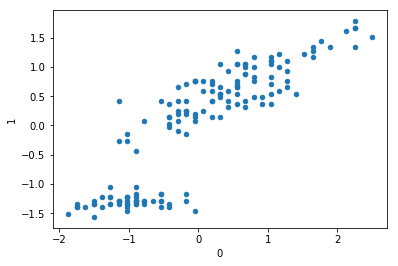

In [17]:
pd.DataFrame(X).plot.scatter(0, 1)

In [18]:
kmeans = cluster.KMeans(k)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
kmeans.cluster_centers_

array([[ 0.03665519,  0.41727267],
       [ 1.22961906,  1.02857275],
       [-1.01511749, -1.22859407]])

In [22]:
y_pred = np.array(kmeans.predict(X))

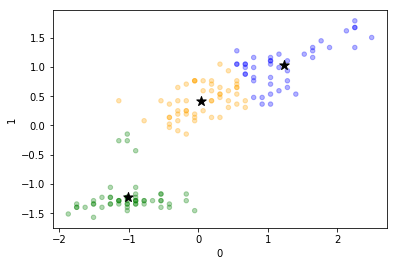

In [39]:
fig, ax = plt.subplots()
colors = [["orange", "blue", "green"][v] for v in y_pred]
pd.DataFrame(X).plot.scatter(0, 1, color = colors, ax = ax, alpha = 0.3)
#ax.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[1], marker = "*")
pd.DataFrame(kmeans.cluster_centers_).plot.scatter(0, 1, 
                            marker = "*", s = 100, ax = ax, color = "black")


In [25]:
distances = np.zeros([len(X)])

for i, center in enumerate(kmeans.cluster_centers_):
    print(center)
    points = X[y_pred == i]
    distances[y_pred == i] = np.sqrt(np.sum((points - center) ** 2, axis = 1))
    

[0.03665519 0.41727267]
[1.22961906 1.02857275]
[-1.01511749 -1.22859407]


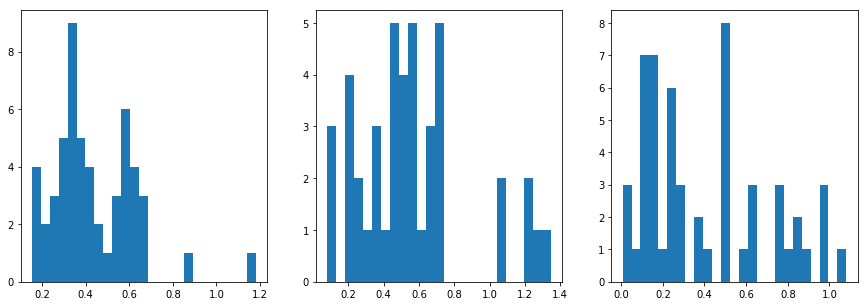

In [51]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(distances[y_pred == 0], bins = 25);
plt.subplot(1, 3, 2)
plt.hist(distances[y_pred == 1], bins = 25);
plt.subplot(1, 3, 3)
plt.hist(distances[y_pred == 2], bins = 25);

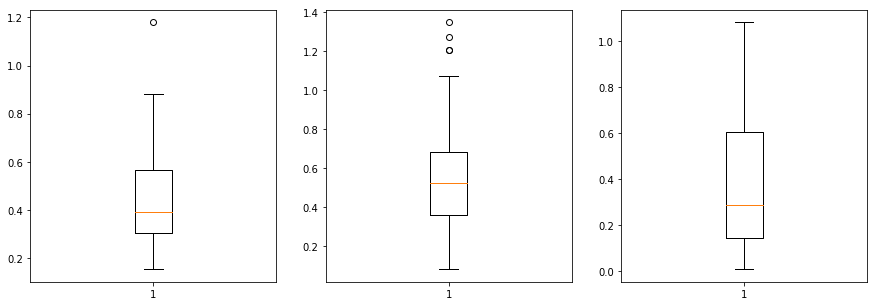

In [53]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot(distances[y_pred == 0]);
plt.subplot(1, 3, 2)
plt.boxplot(distances[y_pred == 1]);
plt.subplot(1, 3, 3)
plt.boxplot(distances[y_pred == 2]);

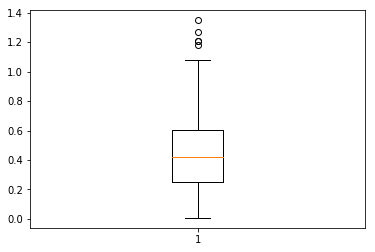

In [55]:
plt.boxplot(distances);

In [67]:
def find_outliers(y):
    q1, q3 = np.percentile(y,[25, 75])
    iqr = q3 - q1
    uw = min(np.max(y), q3 + 1.5 * iqr)
    lw = max(np.min(y), q1 - 1.5 * iqr)
    return (y > uw) | (y < lw)
find_outliers(distances)

(150,)

In [71]:
outliers = find_outliers(distances)

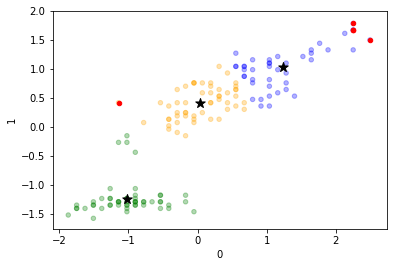

In [72]:
_, ax = plt.subplots()
colors = [["orange", "blue", "green"][v] for v in y_pred]
pd.DataFrame(X).plot.scatter(0, 1, color = colors, ax = ax, alpha = 0.3)
#ax.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[1], marker = "*")
pd.DataFrame(kmeans.cluster_centers_).plot.scatter(0, 1, 
                            marker = "*", s = 100, ax = ax, color = "black")
pd.DataFrame(X[outliers]).plot.scatter(0, 1, color = "red", ax = ax)

In [74]:
clusters_avg_distance = []
for i in range(k):
    clusters_avg_distance.append(distances[y_pred == i].mean())

In [75]:
clusters_avg_distance

[0.4356397447256547, 0.5581982451699109, 0.40236071358833186]

So we can see third cluster is most dense. 

In [76]:
from sklearn import preprocessing

In [77]:
y_true = preprocessing.LabelEncoder().fit_transform(df.Species)

In [78]:
metrics.homogeneity_score(y_true, y_pred)

0.5826296711195839

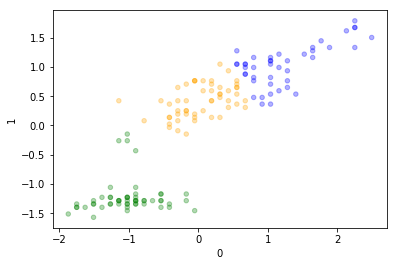

In [79]:
_, ax = plt.subplots()
colors = [["orange", "blue", "green"][v] for v in y_pred]
pd.DataFrame(X).plot.scatter(0, 1, color = colors, ax = ax, alpha = 0.3)

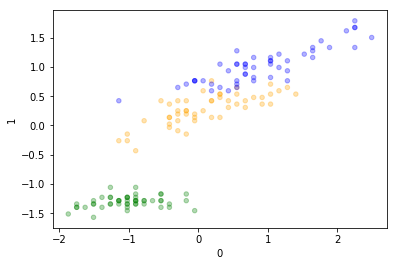

In [82]:
_, ax = plt.subplots()
colors = [["green", "orange", "blue"][v] for v in y_true]
pd.DataFrame(X).plot.scatter(0, 1, color = colors, ax = ax, alpha = 0.3)

In [97]:
import skimage as ski
import skimage.io
import skimage.transform

In [85]:
img = ski.io.imread("https://3b0ad08da0832cf37cf5-435f6e4c96078b01f281ebf62986b022.ssl.cf3.rackcdn.com/articles/content/How-old-is-my-cat-in-human-years_0af22fe2-0f4a-4b24-821f-695be0d18cee.jpg")

In [87]:
img.shape

(350, 940, 3)

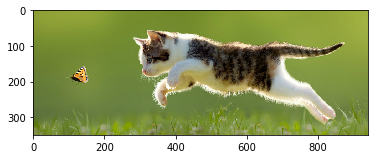

In [101]:
plt.imshow(img)

In [90]:
img_2d = img.reshape((-1, 3))
img_2d = (img_2d - img_2d.mean(axis = 0)) / img_2d.std(axis=0)

In [91]:
img_2d.shape

(329000, 3)

In [102]:
kmeans = cluster.KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(img_2d)

In [93]:
y_pred.shape

(329000,)

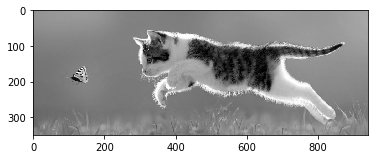

In [98]:
plt.imshow(ski.color.rgb2gray(img), cmap = "gray")

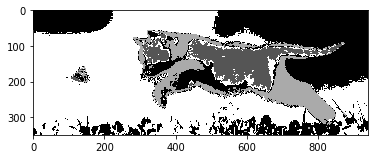

In [103]:
plt.imshow(y_pred.reshape((350, 940)), cmap = "gray")